In [1]:
!pip install rarfile
import os
import urllib.request
import requests
import rarfile

In [2]:
url = 'https://personal.utdallas.edu/~qxl170330/Dataset/COVID-19/'
page = requests.get(url).text

In [3]:
import tensorflow as tf

In [4]:
from urllib.request import urlretrieve
DATA_DIR_1        = 'data'
DATA_FILE_TRAIN_1 = 'Train1.rar'
DATA_URL_TRAIN_1  = 'https://personal.utdallas.edu/~qxl170330/Dataset/DatasetAllAugmented.rar'
DATA_DIR_TRAIN    = 'data/imagenet64/train'

if (os.path.exists(DATA_DIR_1) == False):
    os.mkdir(DATA_DIR_1)
if (os.path.exists(DATA_FILE_TRAIN_1) == False):
    urllib.request.urlretrieve(DATA_URL_TRAIN_1, DATA_FILE_TRAIN_1)
with rarfile.RarFile(DATA_FILE_TRAIN_1, 'r') as rar_ref:
    rar_ref.extractall(DATA_DIR_TRAIN)

In [5]:
datagen = tf.keras.preprocessing.image.ImageDataGenerator(validation_split=0.2)
train = datagen.flow_from_directory(DATA_DIR_TRAIN + '/DatasetAllAugmented',
                                    class_mode='binary', target_size=(32,32), subset="training")
test = datagen.flow_from_directory(DATA_DIR_TRAIN + '/DatasetAllAugmented',
                                    class_mode='binary', target_size=(32,32), subset="validation")

Found 1460 images belonging to 2 classes.
Found 364 images belonging to 2 classes.


In [6]:
batchX, batchy = train.next()
print('Batch shape=%s, min=%.3f, max=%.3f' % (batchX.shape, batchX.min(), batchX.max()))

Batch shape=(32, 32, 32, 3), min=0.000, max=255.000


In [7]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='softmax'),
    tf.keras.layers.Dense(2)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


history = model.fit_generator(train, epochs=8)


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/8
46/46 [==============================] - 8s 170ms/step - loss: 0.6935 - accuracy: 0.5005
Epoch 2/8
46/46 [==============================] - 8s 173ms/step - loss: 0.6936 - accuracy: 0.4923
Epoch 3/8
46/46 [==============================] - 8s 172ms/step - loss: 0.6933 - accuracy: 0.4965
Epoch 4/8
46/46 [==============================] - 8s 174ms/step - loss: 0.6931 - accuracy: 0.5114
Epoch 5/8
46/46 [==============================] - 8s 170ms/step - loss: 0.6933 - accuracy: 0.4810
Epoch 6/8
46/46 [==============================] - 8s 174ms/step - loss: 0.6932 - accuracy: 0.4820
Epoch 7/8
46/46 [==============================] - 8s 173ms/step - loss: 0.6932 - accuracy: 0.4993
Epoch 8/8
46/46 [==============================] - 8s 174ms/step - loss: 0.6933 - accuracy: 0.4882


In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, None)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               393344    
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 258       
Total params: 410,114
Trainable params: 410,114
Non-trainable params: 0
_________________________________________________________________


In [9]:
model.evaluate(test)

12/12 [==============================] - 2s 160ms/step - loss: 0.6931 - accuracy: 0.5000


[0.6931476593017578, 0.5]

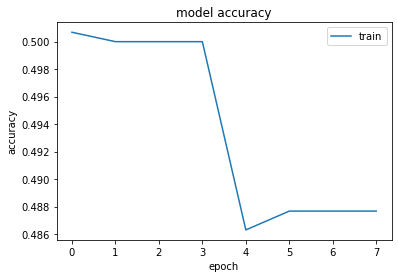

In [10]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

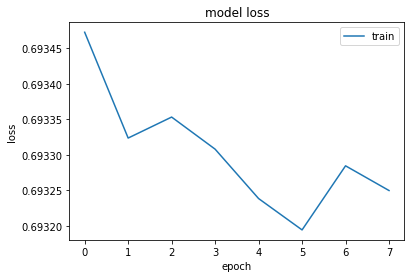

In [11]:
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

Actual:  1.0
Predicted :  [[-0.15559416 -0.15755387]]


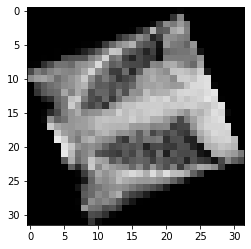

Actual:  0.0
Predicted :  [[-0.15559416 -0.15755387]]


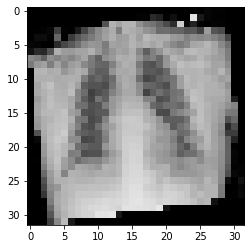

Actual:  0.0
Predicted :  [[-0.15559416 -0.15755387]]


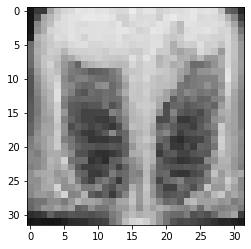

Actual:  1.0
Predicted :  [[-0.15559416 -0.15755387]]


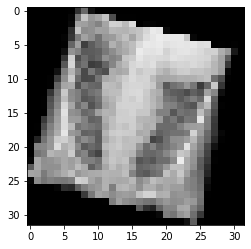

Actual:  0.0
Predicted :  [[-0.15559416 -0.15755387]]


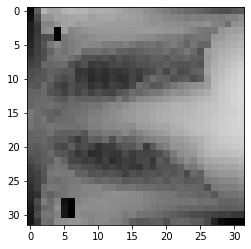

In [12]:
import numpy as np
x,y = test.next()
for i in range(0,5):
    image = x[i]
    img = image[np.newaxis,:,:]
    plt.imshow(x[i].astype('uint8'))
    print("Actual: ", y[i])
    print("Predicted : ",model.predict(img))
    plt.show()